Implement a KNN model to classify the animals in to categorie


In [3]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [4]:
#load data
df = pd.read_csv('Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
df.shape

(101, 18)

In [6]:
# check for cardinality in df

for var in df:

    print(var, ' contains ', len(df[var].unique()), ' labels')

animal name  contains  100  labels
hair  contains  2  labels
feathers  contains  2  labels
eggs  contains  2  labels
milk  contains  2  labels
airborne  contains  2  labels
aquatic  contains  2  labels
predator  contains  2  labels
toothed  contains  2  labels
backbone  contains  2  labels
breathes  contains  2  labels
venomous  contains  2  labels
fins  contains  2  labels
legs  contains  6  labels
tail  contains  2  labels
domestic  contains  2  labels
catsize  contains  2  labels
type  contains  7  labels


In [7]:
# Assuming df is your DataFrame
animal_type_counts = df['type'].value_counts().reset_index()

# Rename the columns for clarity
animal_type_counts.columns = ['Animal Type', 'Count']

# Display the counts
print(animal_type_counts)

   Animal Type  Count
0            1     41
1            2     20
2            4     13
3            7     10
4            6      8
5            3      5
6            5      4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


Data exploration and visualizaion

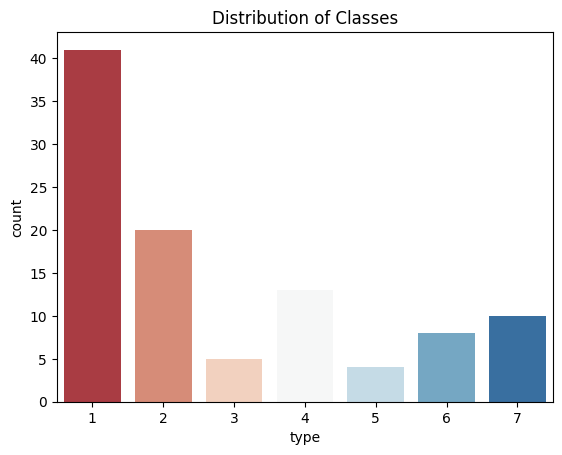

In [9]:
sns.countplot(data = df, x = "type", palette = "RdBu")
plt.title("Distribution of Classes")
plt.show()

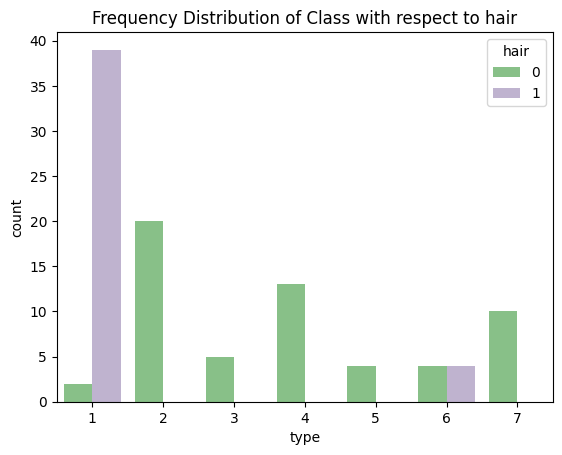

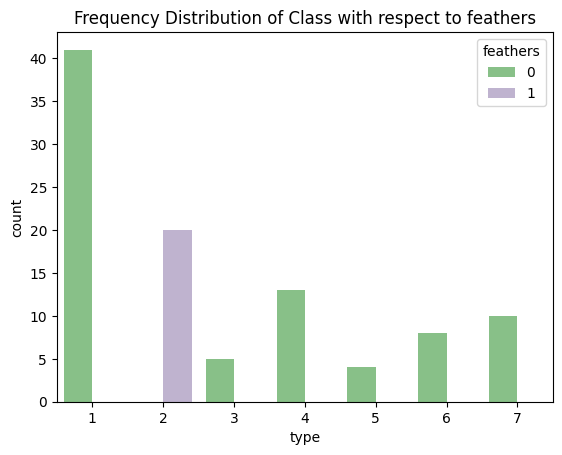

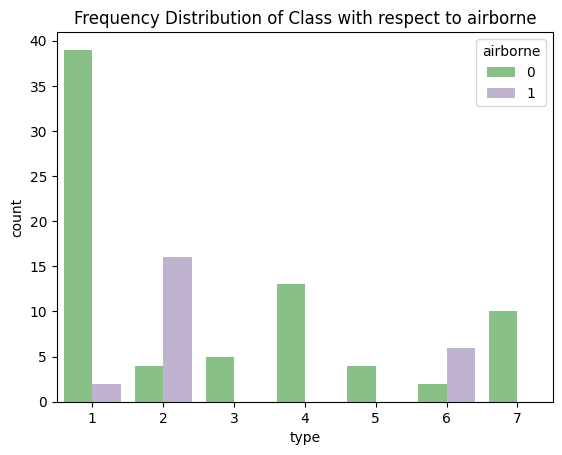

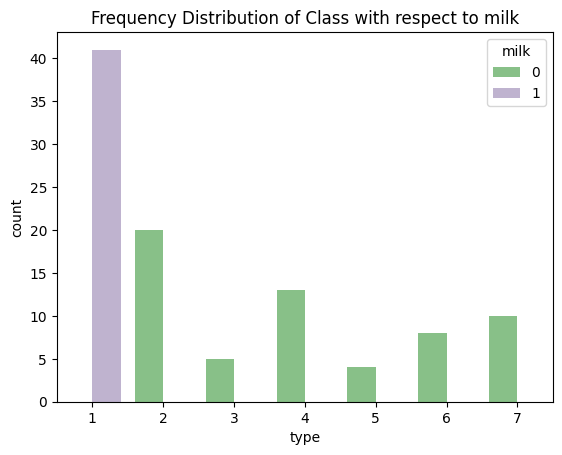

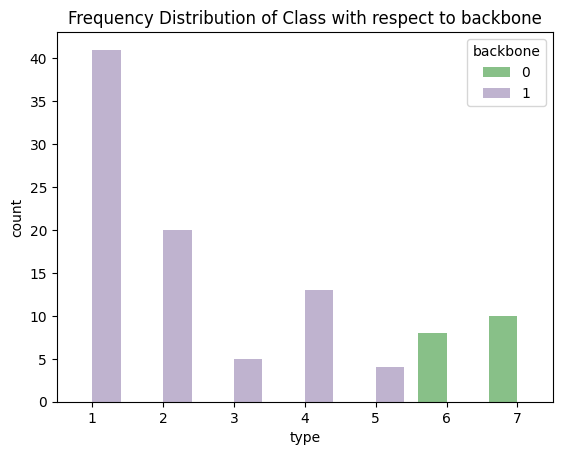

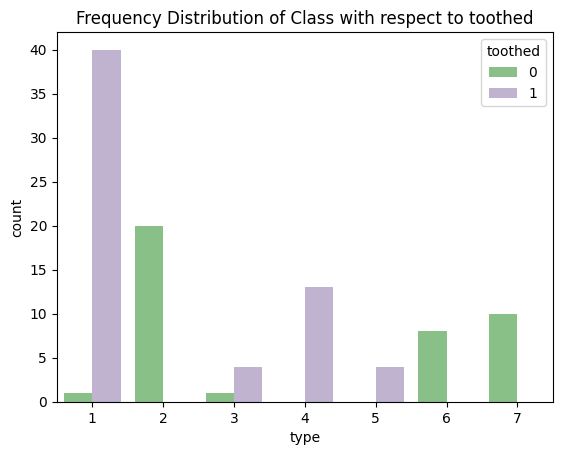

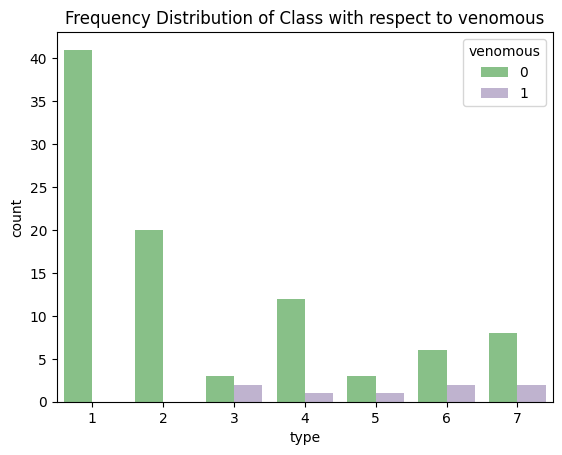

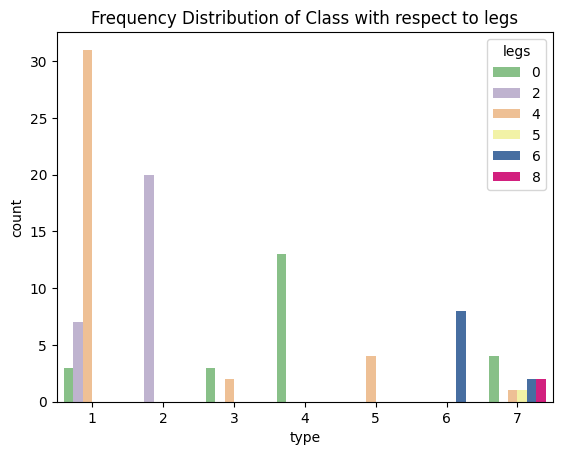

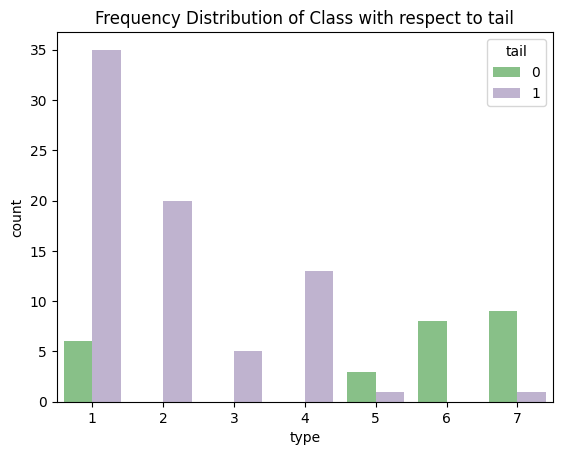

In [10]:
for hue in ["hair", "feathers", "airborne", "milk", "backbone", "toothed", "venomous", "legs", "tail"]:
    sns.countplot(data = df, x = "type", hue = hue, palette = "Accent")
    plt.title(f"Frequency Distribution of Class with respect to {hue}")
    plt.show()

<ipython-input-11-e483bf2bde06>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

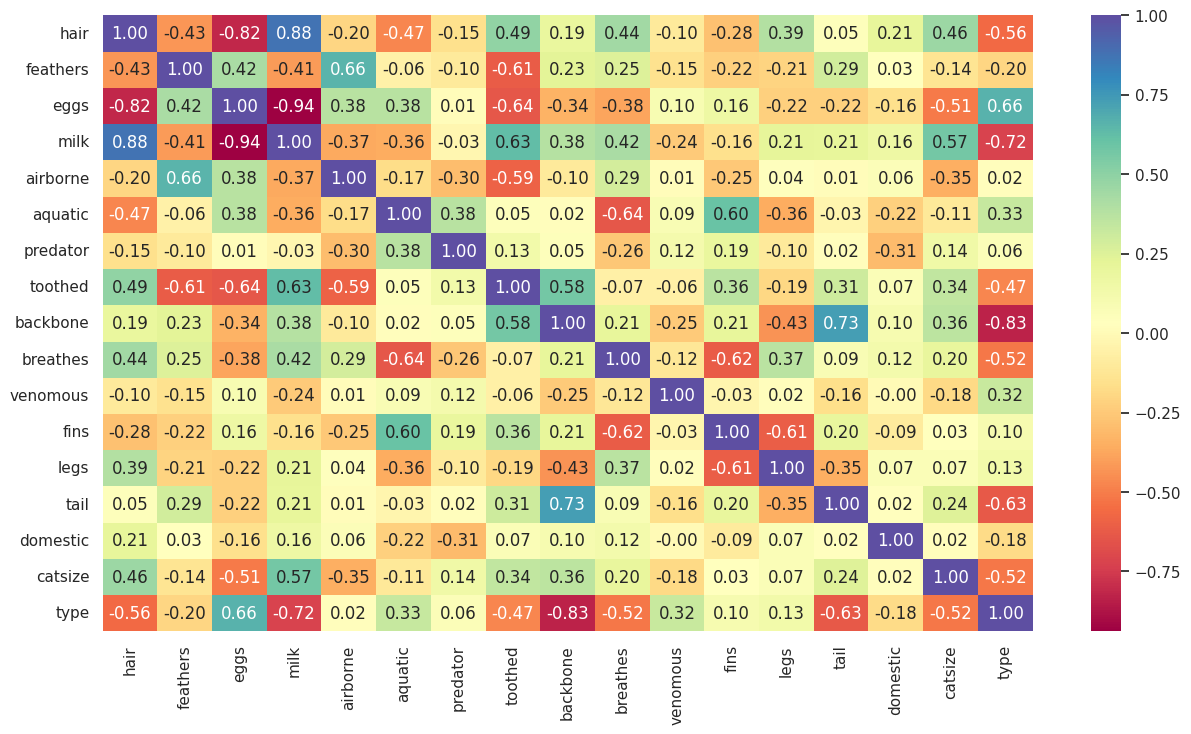

In [11]:
corr = df.corr()
sns.set(rc = {"figure.figsize": (15, 8)})

sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, cmap = "Spectral", fmt = ".2f")

In [1]:
#pairwise plot of all the features
sns.pairplot(df,hue='type')
plt.show()

NameError: ignored

In [12]:
X = df.drop(["type"], axis = 1)
y = df["type"]

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [15]:
ohe = OneHotEncoder()
X = ohe.fit_transform(X)


In [16]:
# Since we are using cross validation, we don't need to divide our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.0001, random_state = 22)

In [17]:
print(f"X_train : {X_train.shape}")
print(f"y_train : {y_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_test : {y_test.shape}")

X_train : (100, 136)
y_train : (100,)
X_test : (1, 136)
y_test : (1,)


In [18]:
knn = KNeighborsClassifier(n_neighbors=4,metric='manhattan')


In [19]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [20]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [21]:
y_pred = knn.predict(X_test)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           4       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [27]:
accuracy_score(y_test,y_pred)

1.0

With above practice, We found the accuracy to be 100%

